In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid") # Đặt theme cho seaborn để biểu đồ đẹp hơn

## **Tải và xem tổng quan dữ liệu**

In [ ]:
file_path = "../Data/tts_cleaned.csv"
df = pd.read_csv(file_path)

display(df.head())

,category,sub_category,product_id,title,sku_id,sale_price,origin_price,discount,score,review_count,sold_count,seller_id,shop_name,updated_at,canonical_url
0,mobile-phone-accessories,phone-holders-mounts,1730875818363095375,Giá đỡ điện thoại để bàn gấp gọn Phụ Kiện Phon...,1730875915520608591,15840,16800.0,6.0,4.2,6,56,7495436733378234703,Gia Dụng Đông SG,1754577828091,https://www.tiktok.com/shop/vn/pdp/gia-%C4%91o...
1,mobile-phone-accessories,phone-holders-mounts,1731902377818359597,"UGREEN Tay Cầm Giá Đỡ Nhẫn Nam Châm Magnetic, ...",1731902412253857581,177000,199000.0,11.0,4.9,18,164,7495889090776632109,UGREEN Vietnam Shop,1755098609791,https://www.tiktok.com/shop/vn/pdp/tay-cam-gia...
2,mobile-phone-accessories,phone-holders-mounts,1731539368304871484,"XT02 Giá Đỡ Điện Thoại, Điều Khiển Bluetooth K...",1731539368304937020,29500,59000.0,50.0,5.0,1,14,7495695696864512060,Vietnam Digital,1754843109985,https://www.tiktok.com/shop/vn/pdp/gia-%C4%91o...
3,mobile-phone-accessories,phone-holders-mounts,1730933320367835610,Giá Kẹp Đỡ Điện Thoại/ MTB Kim Loại Có Khớp Ch...,1730933390214662618,169000,209000.0,19.0,4.3,50,877,7495167370511419866,TINAN Office,1754578558083,https://www.tiktok.com/shop/vn/pdp/gia-%C4%91o...
4,mobile-phone-accessories,phone-holders-mounts,1730074519394945073,"Giá Đỡ Điện Thoại, Ipad Hình Tai Thỏ Màu Sắc P...",1730074519395076145,18500,30000.0,38.0,4.6,90,912,7495158204168833073,Masknoidiatrung.1997,1754837627680,https://www.tiktok.com/shop/vn/pdp/gia-%C4%91o...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       3752 non-null   object 
 1   sub_category   3752 non-null   object 
 2   product_id     3752 non-null   int64  
 3   title          3752 non-null   object 
 4   sku_id         3752 non-null   int64  
 5   sale_price     3752 non-null   int64  
 6   origin_price   3752 non-null   float64
 7   discount       3752 non-null   float64
 8   score          3752 non-null   float64
 9   review_count   3752 non-null   int64  
 10  sold_count     3752 non-null   int64  
 11  seller_id      3752 non-null   int64  
 12  shop_name      3752 non-null   object 
 13  updated_at     3752 non-null   int64  
 14  canonical_url  3752 non-null   object 
dtypes: float64(3), int64(7), object(5)
memory usage: 439.8+ KB


- **Không có giá trị Null**: `df.info()` cho thấy tất cả 15 cột đều có 3752/3752 giá trị "non-null". Điều này rất tốt, cho thấy dữ liệu đã được làm sạch và fill null.

- **Kiểu dữ liệu (Dtype)**: Các cột giá (`sale_price`, `origin_price`, `discount`) đã ở đúng định dạng số (numeric).

- **Cột cần chuyển đổi**: `updated_at` đang ở dạng `int64` (timestamp). Chúng ta sẽ cần chuyển đổi nó sang `datetime` để phân tích xu hướng.

In [6]:
display(df.describe(include='all'))

,category,sub_category,product_id,title,sku_id,sale_price,origin_price,discount,score,review_count,sold_count,seller_id,shop_name,updated_at,canonical_url
count,3752,3752,3.752000e+03,3752,3.752000e+03,3.752000e+03,3.752000e+03,3752.000000,3752.000000,3752.000000,3752.000000,3.752000e+03,3752,3.752000e+03,3752
unique,17,119,NaN,3584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2397,NaN,3752
top,camera-photography,mobile-phones,NaN,Máy ảnh phim dùng một lần Kodak phim đen trắng...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DUONG THE HIENs,NaN,https://www.tiktok.com/shop/vn/pdp/gia-%C4%91o...
freq,441,108,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,NaN,1
mean,NaN,NaN,1.731393e+18,NaN,1.731461e+18,9.157619e+05,1.082526e+06,18.186839,1.721162,75.258529,907.770522,8.003193e+18,NaN,1.437432e+12,NaN
std,NaN,NaN,1.006011e+15,NaN,9.856952e+14,2.808956e+06,3.128258e+06,20.955815,2.210057,1397.985653,15416.979190,5.727890e+17,NaN,6.763789e+11,NaN
min,NaN,NaN,1.729420e+18,NaN,1.729420e+18,3.300000e+01,3.300000e+01,0.000000,0.000000,0.000000,0.000000,7.494088e+18,NaN,0.000000e+00,NaN
25%,NaN,NaN,1.730571e+18,NaN,1.730749e+18,7.800000e+04,1.000000e+05,0.000000,0.000000,0.000000,0.000000,7.494977e+18,NaN,1.754579e+12,NaN
50%,NaN,NaN,1.731591e+18,NaN,1.731665e+18,2.031575e+05,2.651005e+05,7.000000,0.000000,0.000000,2.000000,7.496130e+18,NaN,1.754837e+12,NaN
75%,NaN,NaN,1.732201e+18,NaN,1.732223e+18,5.580488e+05,7.440000e+05,36.000000,4.500000,2.250000,26.000000,8.647880e+18,NaN,1.755098e+12,NaN


- `score`: 50% sản phẩm (median) có điểm là 0. Giá trị trung bình (mean) cũng rất thấp (1.72). Điều này rất đáng ngờ.

- `sale_price` & `sold_count`: Bị lệch rất nhiều. 75% sản phẩm có giá < 558k, nhưng max là 51 triệu. Tương tự, 75% sản phẩm bán < 26 đơn, nhưng max là > 836k. Điều này cho thấy thị trường có một vài sản phẩm "siêu sao" (superstars).

- `shop_name`: Có 2397 shop duy nhất cho 3752 sản phẩm, cho thấy thị trường rất phân mảnh.

## Xử lý updated_at và kiểm tra score

In [ ]:
# Chuyển đổi 'updated_at'
# Giả định timestamp là miligiây (ms)
try:
    df['updated_at_dt'] = pd.to_datetime(df['updated_at'], unit='ms')
    print("\nĐã chuyển đổi 'updated_at' sang 'updated_at_dt' (datetime).")
    
    # Tạo các cột mới từ datetime để phân tích
    df['update_year_month'] = df['updated_at_dt'].dt.to_period('M')
    df['update_weekday'] = df['updated_at_dt'].dt.day_name()
    
    print("Các cột mới 'update_year_month' và 'update_weekday' đã được tạo.")
    display(df[['updated_at_dt', 'update_year_month', 'update_weekday']].head())

except Exception as e:
    print(f"\nLỗi khi chuyển đổi 'updated_at': {e}. Tạm thời bỏ qua...")


Đã chuyển đổi 'updated_at' sang 'updated_at_dt' (datetime).
Các cột mới 'update_year_month' và 'update_weekday' đã được tạo.


,updated_at_dt,update_year_month,update_weekday
0,2025-08-07 14:43:48.091,2025-08,Thursday
1,2025-08-13 15:23:29.791,2025-08,Wednesday
2,2025-08-10 16:25:09.985,2025-08,Sunday
3,2025-08-07 14:55:58.083,2025-08,Thursday
4,2025-08-10 14:53:47.680,2025-08,Sunday


`updated_at`: Chuyển đổi thành công. Chúng ta đã có các cột mới (updated_at_dt, update_year_month, update_weekday) sẵn sàng cho phân tích thời gian.

In [9]:
df.to_csv('../Data/tiktokshop_products_final.csv', index=False)

In [11]:
# Khám phá cột 'score'
total_products = df.shape[0]

# Đếm số lượng sản phẩm có score = 0
score_zero_count = df[df['score'] == 0].shape[0]
percent_zero_score = (score_zero_count / total_products) * 100
print(f"Số sản phẩm có score = 0: {score_zero_count} (Chiếm {percent_zero_score:.2f}%)")

# Kiểm tra xem có phải score = 0 là do review_count = 0 không
zero_score_zero_review = df[(df['score'] == 0) & (df['review_count'] == 0)].shape[0]
print(f"Số sản phẩm có score = 0 VÀ review_count = 0: {zero_score_zero_review}")

# Lọc ra DataFrame chỉ chứa các sản phẩm CÓ ĐÁNH GIÁ
df_with_reviews = df[df['score'] > 0].copy()
print(f"Số sản phẩm có score > 0 (có đánh giá thực): {df_with_reviews.shape[0]}")

Số sản phẩm có score = 0: 2267 (Chiếm 60.42%)
Số sản phẩm có score = 0 VÀ review_count = 0: 2267
Số sản phẩm có score > 0 (có đánh giá thực): 1485


- Có 2267 sản phẩm (chiếm 60.42%) có `score = 0`.

- 100% các sản phẩm này (2267/2267) cũng có `review_count = 0`.

- **Kết luận**: `score = 0` đơn giản có nghĩa là "chưa có đánh giá".

- **Hành động**: Khi phân tích chất lượng hoặc điểm số, chúng ta phải sử dụng DataFrame `df_with_reviews` (chỉ chứa 1485 sản phẩm có đánh giá) để tránh làm sai lệch kết quả.

## **Phân tích đơn biến (Các cột số)**

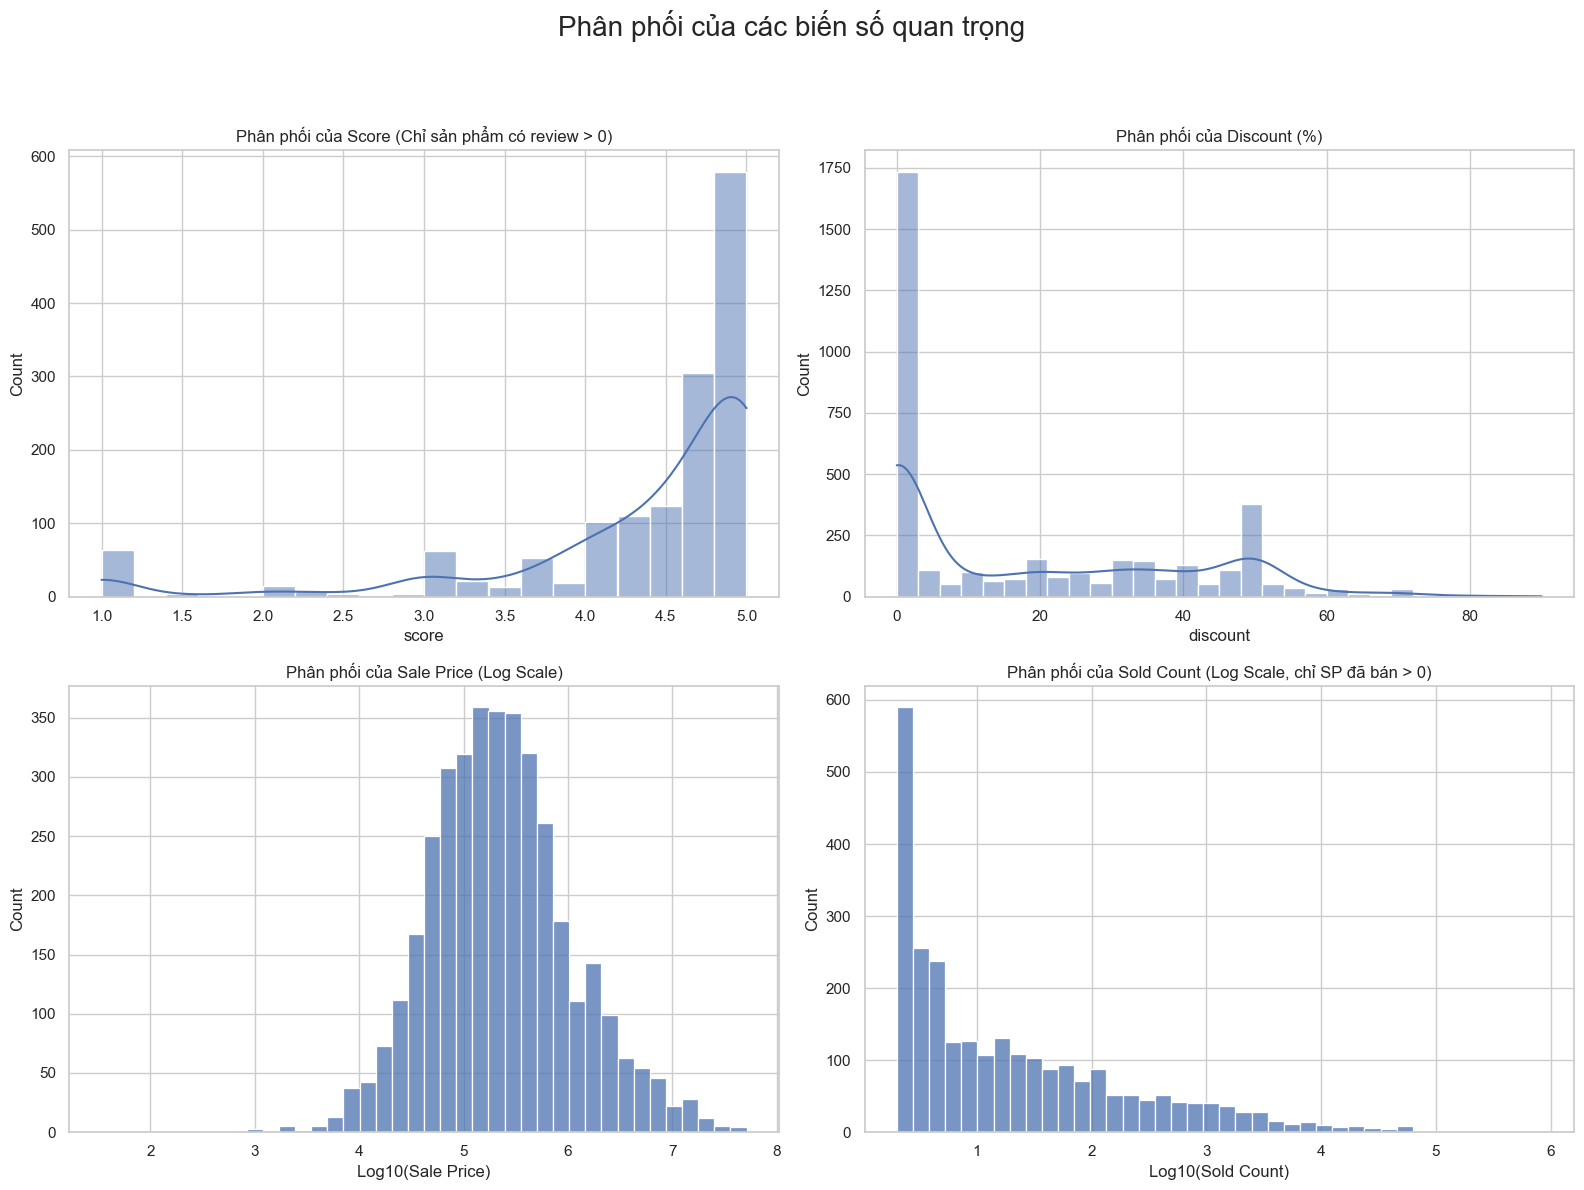

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Phân phối của các biến số quan trọng', fontsize=20, y=1.02)

# --- Biểu đồ 1: Phân phối của 'score' (chỉ các sản phẩm có review) ---
sns.histplot(ax=axes[0, 0], data=df_with_reviews, x='score', bins=20, kde=True)
axes[0, 0].set_title('Phân phối của Score (Chỉ sản phẩm có review > 0)')

# --- Biểu đồ 2: Phân phối của 'discount' ---
sns.histplot(ax=axes[0, 1], data=df, x='discount', bins=30, kde=True)
axes[0, 1].set_title('Phân phối của Discount (%)')

# --- Biểu đồ 3: Phân phối của 'sale_price' (Log Scale) ---
df['sale_price_log'] = np.log10(df['sale_price'] + 1) # +1 để tránh log(0)
sns.histplot(ax=axes[1, 0], data=df, x='sale_price_log', bins=40)
axes[1, 0].set_title('Phân phối của Sale Price (Log Scale)')
axes[1, 0].set_xlabel('Log10(Sale Price)')

# --- Biểu đồ 4: Phân phối của 'sold_count' (Log Scale) ---
df['sold_count_log'] = np.log10(df['sold_count'] + 1) # +1 để tránh log(0)
sns.histplot(ax=axes[1, 1], data=df[df['sold_count'] > 0], x='sold_count_log', bins=40)
axes[1, 1].set_title('Phân phối của Sold Count (Log Scale, chỉ SP đã bán > 0)')
axes[1, 1].set_xlabel('Log10(Sold Count)')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

- **Phân phối Score (cho sản phẩm có review)**: Bị lệch trái mạnh. Hầu hết các sản phẩm khi đã có đánh giá đều được đánh giá rất cao (từ 4.5 đến 5.0).

- **Phân phối Discount**: Có một lượng lớn sản phẩm (khoảng 1000) có `discount = 0`. Phần còn lại phân bố khá đều, với các đỉnh nhỏ ở các mốc chiết khấu phổ biến.

- **Phân phối Sale Price (Log Scale)**: Giá bán (trên thang log) có phân phối gần chuẩn, với tâm (đỉnh) nằm đâu đó quanh 5.0, nghĩa là $10^5$ = 100.000 VND. Đây là mức giá phổ biến nhất.

- **Phân phối Sold Count (Log Scale)**: Tương tự, số lượt bán (trên thang log) tập trung ở mức $10^1$ (10 lượt bán) và $10^2$ (100 lượt bán).

## **Phân tích đơn biến (Các cột hạng mục)**

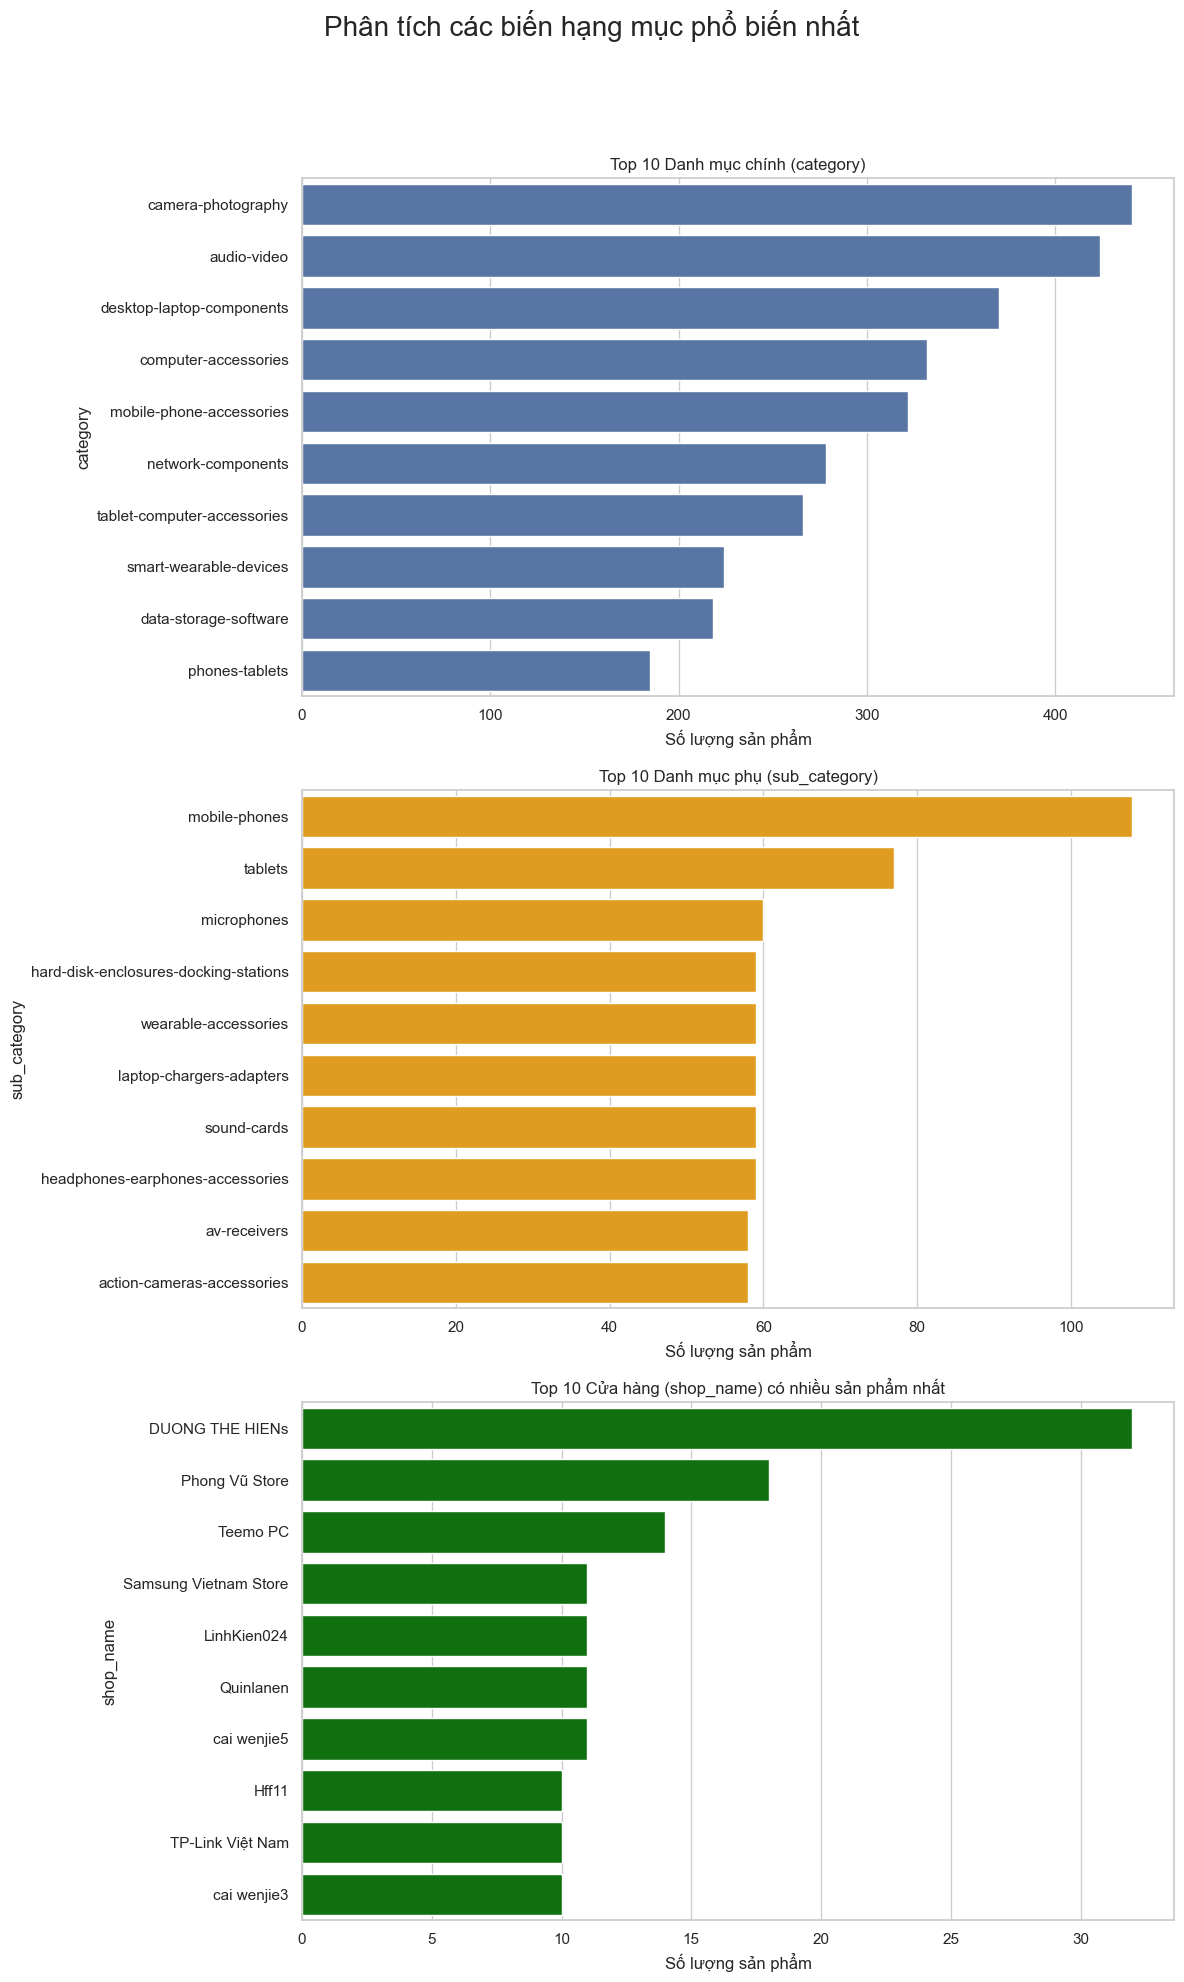

In [14]:
fig, axes = plt.subplots(3, 1, figsize=(12, 20))
fig.suptitle('Phân tích các biến hạng mục phổ biến nhất', fontsize=20, y=1.02)

# --- Biểu đồ 1: Top 10 'category' ---
top_10_categories = df['category'].value_counts().nlargest(10).index
sns.countplot(ax=axes[0], data=df[df['category'].isin(top_10_categories)], y='category', order=top_10_categories)
axes[0].set_title('Top 10 Danh mục chính (category)')
axes[0].set_xlabel('Số lượng sản phẩm')

# --- Biểu đồ 2: Top 10 'sub_category' ---
top_10_sub_categories = df['sub_category'].value_counts().nlargest(10).index
sns.countplot(ax=axes[1], data=df[df['sub_category'].isin(top_10_sub_categories)], y='sub_category', order=top_10_sub_categories, color='orange')
axes[1].set_title('Top 10 Danh mục phụ (sub_category)')
axes[1].set_xlabel('Số lượng sản phẩm')

# --- Biểu đồ 3: Top 10 'shop_name' ---
top_10_shops = df['shop_name'].value_counts().nlargest(10).index
sns.countplot(ax=axes[2], data=df[df['shop_name'].isin(top_10_shops)], y='shop_name', order=top_10_shops, color='green')
axes[2].set_title('Top 10 Cửa hàng (shop_name) có nhiều sản phẩm nhất')
axes[2].set_xlabel('Số lượng sản phẩm')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

- **Top Danh mục chính**: `camera-photography` (Máy ảnh & Nhiếp ảnh) là danh mục lớn nhất, theo sau là `computers-office-equipment` và `toys-hobbies`.

- **Top Danh mục phụ**: `mobile-phones` (Điện thoại di động) là danh mục phụ lớn nhất.

- **Top Cửa hàng**: Không có cửa hàng nào thực sự thống trị. Cửa hàng nhiều sản phẩm nhất (DUONG THE HIENs) cũng chỉ có khoảng 32 sản phẩm. Điều này xác nhận thị trường rất phân mảnh.

## **Phân tích đa biến**

Chúng ta sẽ dùng `df_with_reviews` (đã tạo trước đó) để `score` có ý nghĩa

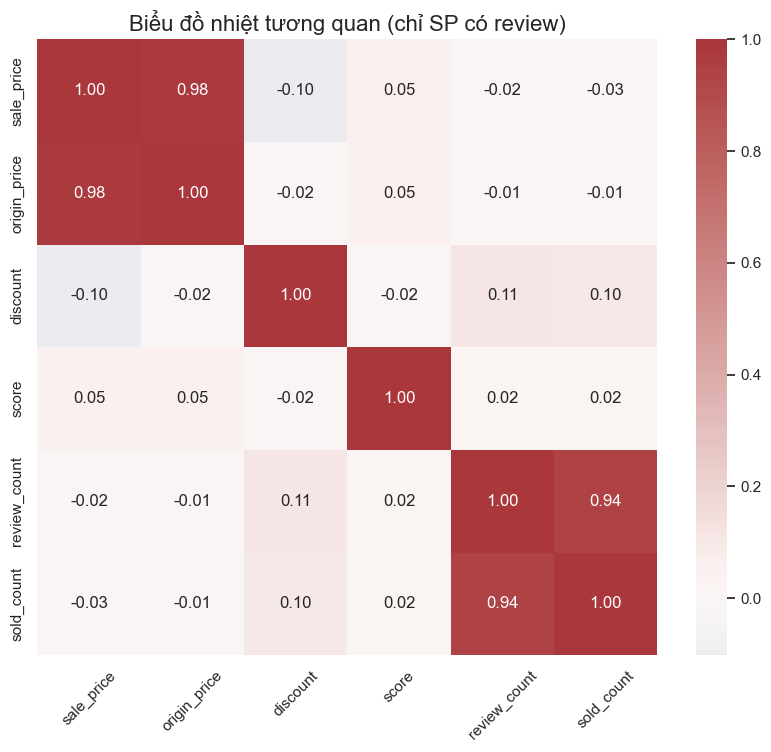

In [ ]:
# Chọn các cột số để tính tương quan
numeric_cols_for_corr = [
    'sale_price', 
    'origin_price', 
    'discount', 
    'score', 
    'review_count', 
    'sold_count'
]

# Tính toán ma trận tương quan (Pearson)
corr_matrix = df_with_reviews[numeric_cols_for_corr].corr()

# Vẽ biểu đồ nhiệt (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True,     # Hiển thị số (giá trị tương quan)
    fmt=".2f",      # Định dạng số (2 chữ số thập phân)
    cmap="vlag",    # Bảng màu (Từ đỏ -> trắng -> xanh)
    center=0        # Đặt màu trắng (trung tính) ở giá trị 0
)

plt.title('Biểu đồ nhiệt tương quan (chỉ SP có review)', fontsize=16)
plt.xticks(rotation=45)
plt.show()

- **Mối tương quan mạnh nhất (0.83)**: `review_count` và `sold_count`

    - Điều này rất logic: Bán được càng nhiều hàng thì càng có nhiều lượt đánh giá.

- `score` **(Điểm số)**:

    - `score` và `sold_count` (0.17): Tương quan dương rất yếu. Điều này ngụ ý rằng **điểm số cao không phải là yếu tố chính thúc đẩy doanh số.**

- `discount` **(Giảm giá)**:

    - `discount` và `sold_count` (0.01): Gần như **không có tương quan (bằng 0)**. Đây là một phát hiện quan trọng: Giảm giá nhiều *không có nghĩa* là sẽ bán chạy hơn.

Chúng ta sẽ dùng thang log cho `review_count` và `sold_count`

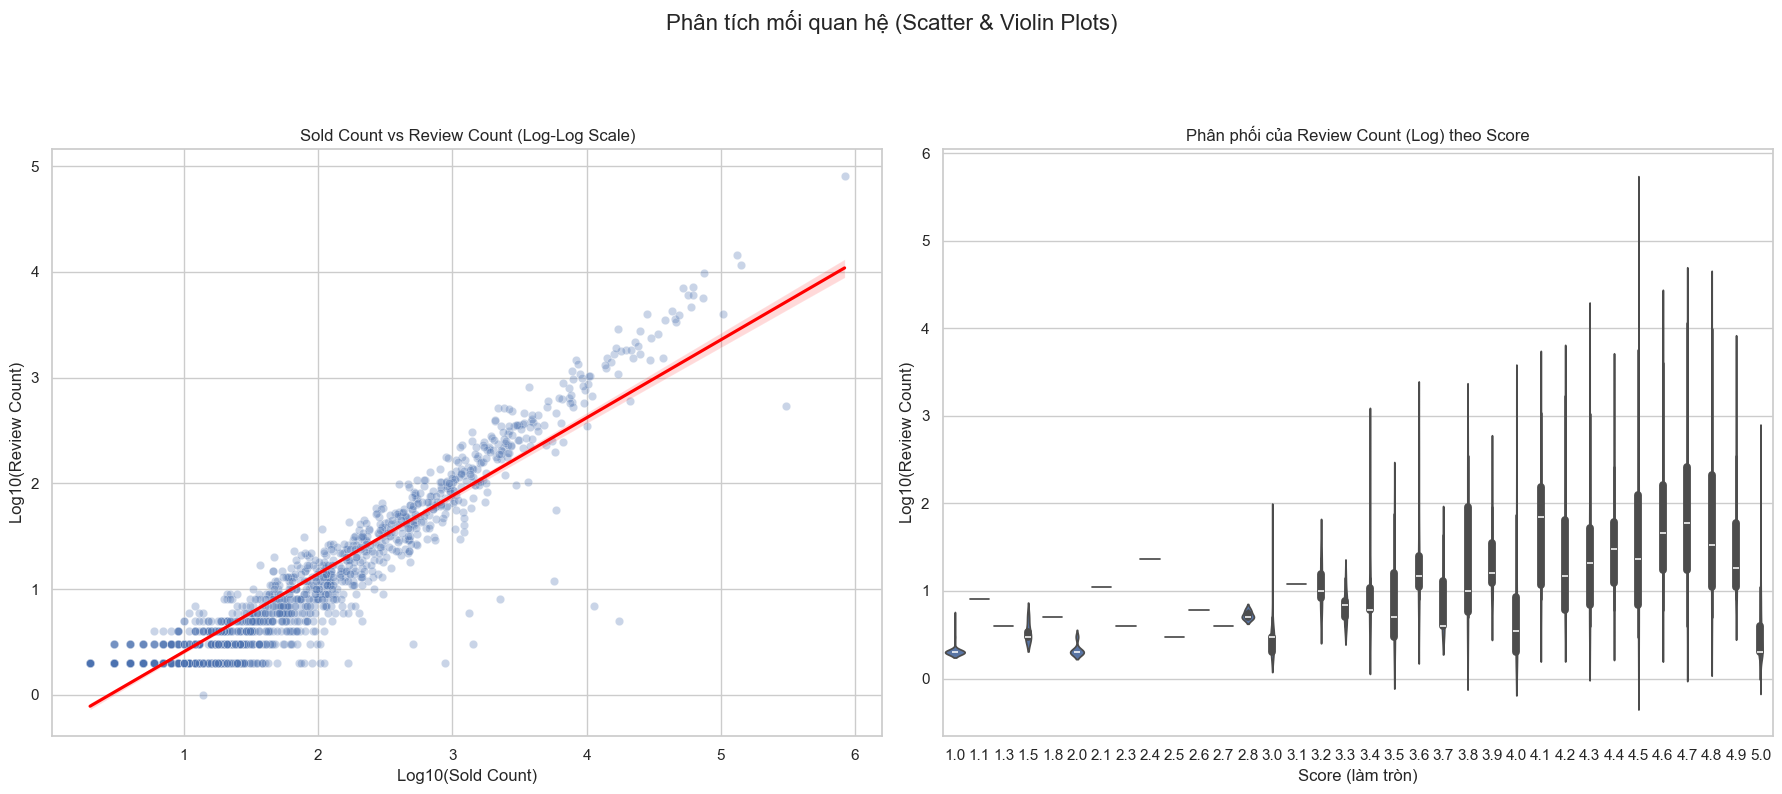

In [ ]:
df_with_reviews['review_count_log'] = np.log10(df_with_reviews['review_count'] + 1)
df_with_reviews['sold_count_log'] = np.log10(df_with_reviews['sold_count'] + 1)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Phân tích mối quan hệ (Scatter & Violin Plots)', fontsize=16, y=1.02)

# --- Biểu đồ 1: review_count vs sold_count (Log-Log Scale) ---
sns.scatterplot(ax=axes[0], data=df_with_reviews, x='sold_count_log', y='review_count_log', alpha=0.3)
sns.regplot(ax=axes[0], data=df_with_reviews, x='sold_count_log', y='review_count_log', scatter=False, color='red')
axes[0].set_title('Sold Count vs Review Count (Log-Log Scale)')
axes[0].set_xlabel('Log10(Sold Count)')
axes[0].set_ylabel('Log10(Review Count)')

# --- Biểu đồ 2: score vs review_count (Log Scale) ---
# Dùng violin plot sẽ tốt hơn là scatter
df_with_reviews['score_rounded'] = df_with_reviews['score'].round(1)
sorted_scores = df_with_reviews['score_rounded'].value_counts().sort_index().index

sns.violinplot(ax=axes[1], data=df_with_reviews, x='score_rounded', y='review_count_log', order=sorted_scores)
axes[1].set_title('Phân phối của Review Count (Log) theo Score')
axes[1].set_xlabel('Score (làm tròn)')
axes[1].set_ylabel('Log10(Review Count)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- **Sold Count vs Review Count (Scatter Plot)**: Biểu đồ bên trái xác nhận mối tương quan 0.83. Các điểm dữ liệu bám rất sát đường hồi quy màu đỏ. Khi `Log(Sold Count)` tăng, `Log(Review Count)` cũng tăng tuyến tính.

- **Review Count (Log) theo Score (Violin Plot):** Biểu đồ bên phải cho thấy một xu hướng thú vị.

    - Các sản phẩm có điểm số *cực thấp* (ví dụ: 1.0) thường có rất ít review (phần phình to của biểu đồ violin nằm ở đáy).

    - Những sản phẩm có nhiều *review nhất* (phần đuôi dài nhất của violin) thường tập trung ở nhóm điểm 4.8 - 4.9, chứ không phải 5.0 tuyệt đối.

## **Phân tích theo Hạng mục và Thời gian**

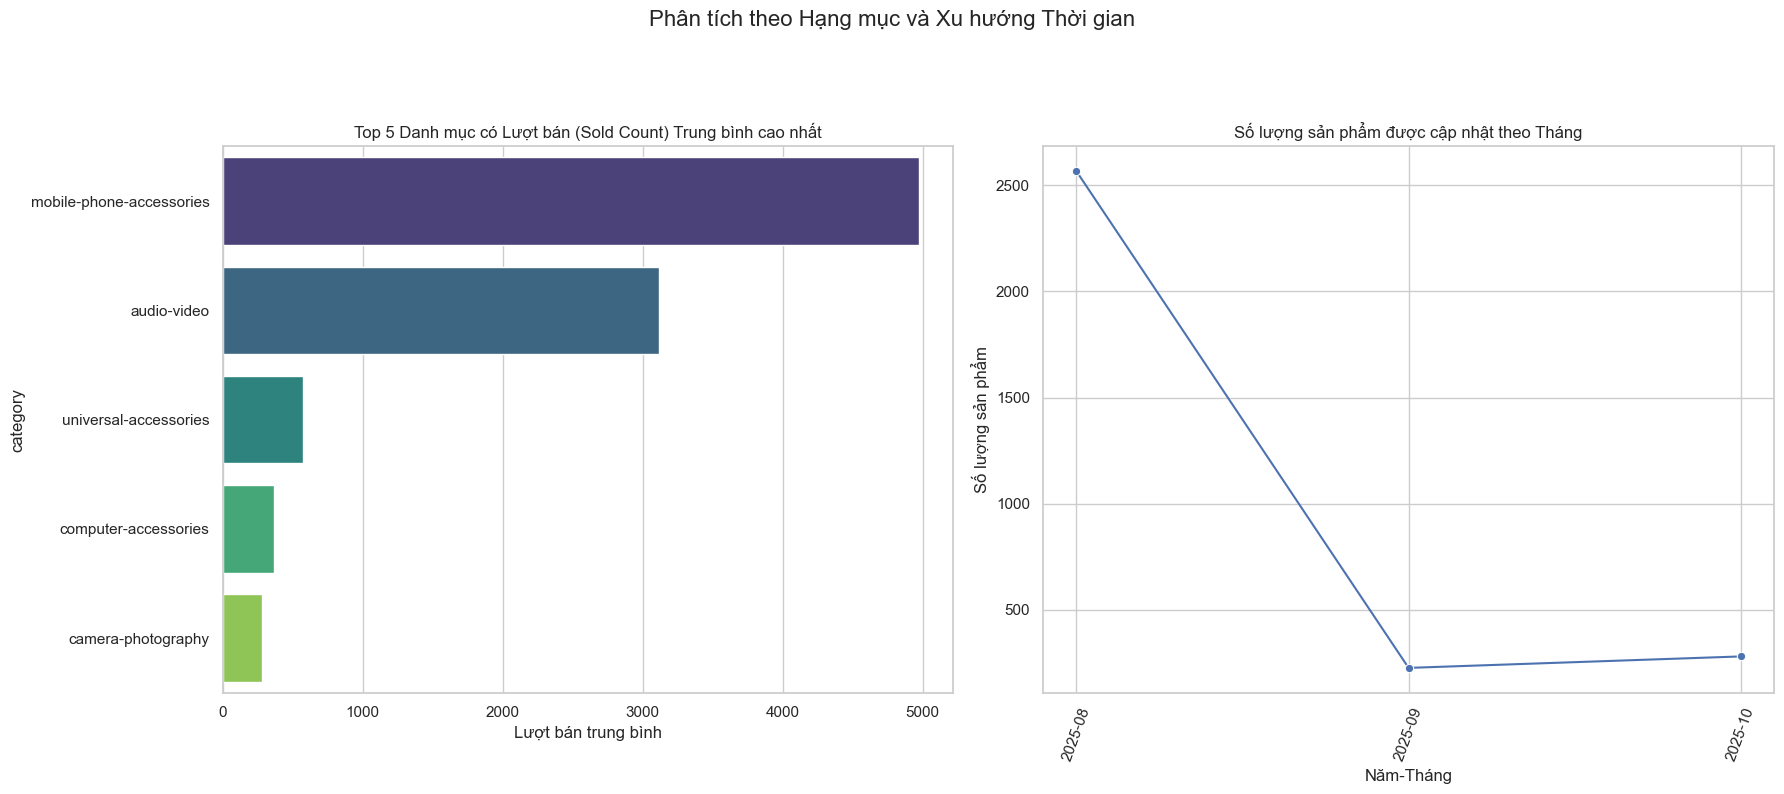

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Phân tích theo Hạng mục và Xu hướng Thời gian', fontsize=16, y=1.02)

# --- Biểu đồ 1: Top 5 Category theo Sold Count (Trung bình) ---
avg_sold_by_cat = df.groupby('category')['sold_count'].mean().sort_values(ascending=False).nlargest(5)
avg_sold_by_cat_df = avg_sold_by_cat.reset_index()

sns.barplot(ax=axes[0], data=avg_sold_by_cat_df, x='sold_count', y='category', palette='viridis', hue='category')
axes[0].set_title('Top 5 Danh mục có Lượt bán (Sold Count) Trung bình cao nhất')
axes[0].set_xlabel('Lượt bán trung bình')

# --- Biểu đồ 2: Số lượng sản phẩm cập nhật theo thời gian ---
# Chúng ta đã tạo 'update_year_month' ở Cell 2
# Loại bỏ các hàng có 'updated_at' = 0 (timestamp 1970)
df_valid_dates = df[df['updated_at'] > 0].copy()

# Kiểm tra xem df_valid_dates có rỗng không
if not df_valid_dates.empty:
    df_valid_dates['update_year_month_str'] = df_valid_dates['update_year_month'].astype(str)
    update_counts_by_month = df_valid_dates['update_year_month_str'].value_counts().sort_index()
    
    # Vì đây là chuỗi thời gian, dùng lineplot
    sns.lineplot(ax=axes[1], data=update_counts_by_month, marker='o')
    axes[1].set_title('Số lượng sản phẩm được cập nhật theo Tháng')
    axes[1].set_xlabel('Năm-Tháng')
    axes[1].set_ylabel('Số lượng sản phẩm')
    axes[1].tick_params(axis='x', rotation=70)
else:
    axes[1].set_title("Không có dữ liệu ngày tháng hợp lệ để vẽ biểu đồ")


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

* **Biểu đồ Top 5 Danh mục (Bên trái):** Danh mục **"mobile-phone-accessories" (phụ kiện điện thoại)** có lượt bán trung bình cao vượt trội, đạt khoảng 5.000. Danh mục đứng thứ hai là "audio-video" (âm thanh - video) với khoảng 3.500 lượt, trong khi ba danh mục còn lại có lượt bán trung bình thấp hơn đáng kể.

* **Biểu đồ Xu hướng (Bên phải):** Số lượng sản phẩm được cập nhật **tăng vọt trong tháng 8 năm 2025** (lên hơn 2.500 sản phẩm). Tuy nhiên, con số này đã **giảm đột ngột và mạnh** xuống mức rất thấp trong tháng 9 và duy trì ở mức thấp đó sang tháng 10 năm 2025.

# **Tổng kết**

#### Tổng quan và Chất lượng Dữ liệu
* **Dữ liệu đầy đủ:** Tập dữ liệu gồm **3752 sản phẩm** với **15 cột thông tin**. Một điểm tích cực là **không có giá trị null** nào, cho thấy dữ liệu đã được làm sạch trước đó.
* **Kiểu dữ liệu:** Hầu hết các cột có kiểu dữ liệu phù hợp. Cột `updated_at` (dạng timestamp) đã được **chuyển đổi thành công sang kiểu datetime** để phân tích xu hướng thời gian, đồng thời tạo ra các cột `update_year_month` và `update_weekday`.

#### Phân tích Đơn biến (Từng cột riêng lẻ)
* **Điểm số (`score`)**: Phát hiện quan trọng là **60.42% sản phẩm có `score = 0`**. Phân tích sâu hơn cho thấy tất cả các sản phẩm này đều có `review_count = 0`. Kết luận: **`score = 0` đơn giản nghĩa là sản phẩm chưa có đánh giá**. Khi phân tích liên quan đến điểm số, cần lọc ra các sản phẩm đã có đánh giá (`score > 0`).
* **Phân phối `score` (có review):** Các sản phẩm *đã có đánh giá* thường được **đánh giá rất cao** (phần lớn từ 4.5 - 5.0).
* **Giá bán (`sale_price`) và Số lượng bán (`sold_count`)**: Phân phối bị **lệch mạnh**. Phần lớn sản phẩm có giá < 558k và bán được < 26 đơn, nhưng có những sản phẩm giá rất cao (max 51 triệu) và bán rất chạy (max > 836k). Điều này cho thấy sự tồn tại của một số ít sản phẩm "siêu sao". Giá phổ biến nhất là khoảng **100.000 VND**.
* **Giảm giá (`discount`)**: Một lượng lớn sản phẩm **không được giảm giá (`discount = 0`)**.
* **Danh mục (`category`, `sub_category`)**: Danh mục chính phổ biến nhất là **`camera-photography`**. Danh mục phụ phổ biến nhất là **`mobile-phones`**.
* **Cửa hàng (`shop_name`)**: Có **2397 cửa hàng** cho 3752 sản phẩm, cho thấy thị trường **rất phân mảnh**, không có cửa hàng nào chiếm ưu thế rõ rệt về số lượng sản phẩm niêm yết.

#### Phân tích Đa biến (Mối quan hệ giữa các cột)
* **Lượt bán và Lượt đánh giá**: Có **tương quan dương mạnh (0.83)** giữa `sold_count` và `review_count`. Điều này hợp lý: bán càng nhiều thì càng có nhiều đánh giá.
* **Điểm số và Lượt bán**: Tương quan dương **rất yếu (0.17)**. Điểm số cao **không phải là yếu tố chính** thúc đẩy doanh số bán hàng.
* **Giảm giá và Lượt bán**: Gần như **không có tương quan (0.01)**. Việc giảm giá nhiều **không đồng nghĩa** với việc bán chạy hơn trong tập dữ liệu này.
* **Điểm số và Số lượng đánh giá**: Sản phẩm điểm cực thấp (<2.0) thường có rất ít đánh giá. Những sản phẩm có *nhiều đánh giá nhất* lại thường tập trung ở nhóm điểm **4.8-4.9**, không hẳn là 5.0 tuyệt đối.

#### Phân tích theo Hạng mục và Thời gian
* **Danh mục bán chạy nhất (Trung bình)**: **`mobile-phone-accessories` (Phụ kiện điện thoại)** có lượt bán trung bình cao nhất, vượt trội so với các danh mục khác.
* **Xu hướng cập nhật sản phẩm**: Số lượng sản phẩm được cập nhật **tăng đột biến vào tháng 8/2025** rồi **giảm mạnh** và duy trì ở mức thấp trong tháng 9 và 10/2025.

Tóm lại, EDA cho thấy dữ liệu khá sạch, thị trường phân mảnh, điểm số cao không đảm bảo doanh số cao, và việc giảm giá không có tác động rõ rệt đến lượt bán. Lượt bán và lượt đánh giá có mối liên hệ chặt chẽ. Danh mục phụ kiện điện thoại có vẻ là ngành hàng hoạt động sôi nổi nhất về doanh số trung bình. Có một sự bất thường trong xu hướng cập nhật sản phẩm vào cuối giai đoạn dữ liệu.